In [ ]:
import os
os.chdir('/content/drive/My Drive/BitVector-3.4.9/BitVector')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from BitVector import BitVector
import pickle

In [ ]:
def bilinear_intp(A,B,C,D,dx,dy):
  '''
  Function that returns the bilinear interpolation of a point with respect to its 4 neighbour points.
  A------B
  |      |
  |    X |
  C------D
  
  A is the CENTER pixel
  dx : x distance from A
  dy : y distance from A
  '''
  return (1-dy)*(1-dx)*A + (1-dy)*dx*B + dy*(1-dx)*C + dy*dx*D

In [ ]:
def lbp (A):
  P=8
  # A is the n neighbourhood of the pixel
  '''
  a00  a01  a02
  a10 'a11' a12
  a20  a21  a22

  V vector starts from from a21 and moves counter-clockwise
  v6 v5 v4
  v7    v3
  v8 v1 v2  

  v1,v3,v5,v7 are the same as original pixels

  for now hard-coded the distances..
  '''
  v1 = A[2,1]
  v2 = bilinear_intp(A[1,1], A[1,2], A[2,1], A[2,2], 0.707, 0.707)
  v3 = A[1,2]
  v4 = bilinear_intp(A[1,1],A[1,2],A[0,1],A[0,2],0.707,0.707)
  v5 = A[0,1]
  v6 = bilinear_intp(A[1,1],A[1,0],A[0,1],A[0,0],0.707,0.707)
  v7 = A[1,0]
  v8 = bilinear_intp(A[1,1],A[1,0],A[2,1],A[2,0],0.707,0.707)

  vec = np.array([v1,v2,v3,v4,v5,v6,v7,v8])
  vec = vec >= A[1,1]


  ############ Using prof. Avinash Kak's BitVector module to get the lbp value ################
  # https://pypi.org/project/BitVector/
  bv = BitVector(bitlist = vec)
  intvals = [int(bv<<1) for _ in range(P)]  # integer values for circular shift
  #print('intvals=',intvals)
  minbv = BitVector(intVal = min(intvals), size = P)  
  #print('min bit vector=',minbv)
  bvruns = minbv.runs()
  #print('bit vector runs=',bvruns)
  if (len(bvruns) > 2): return P + 1
  elif (len(bvruns) == 1 and bvruns[0][0] == '1'): return P
  elif (len(bvruns) == 1 and bvruns[0][0] == '0'): return 0
  else: return len(bvruns[1])


In [ ]:
def get_lbp_hist(img_path, radius=1, num_neighbours=8):
  P=num_neighbours
  R=radius
  img = cv2.imread(img_path,0)
  img = cv2.resize(img,(256,256))
  #img = cv2.resize(img,(40,40))
  #print(img.shape)
  hist =[0]*(P+2)
  for x_idx in range(R, img.shape[1]-R):
    for y_idx in range(R, img.shape[0]-R):
      window = img[y_idx-1:y_idx+2, x_idx-1:x_idx+2]
      pvalue = lbp(window)
  
      hist[pvalue] += 1
  
  hist = np.array(hist).astype(float) / np.sum(hist)
  return hist

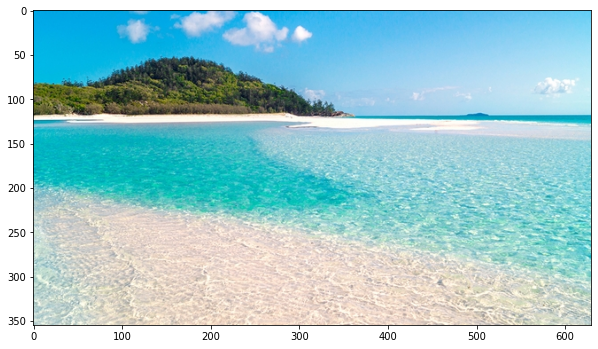

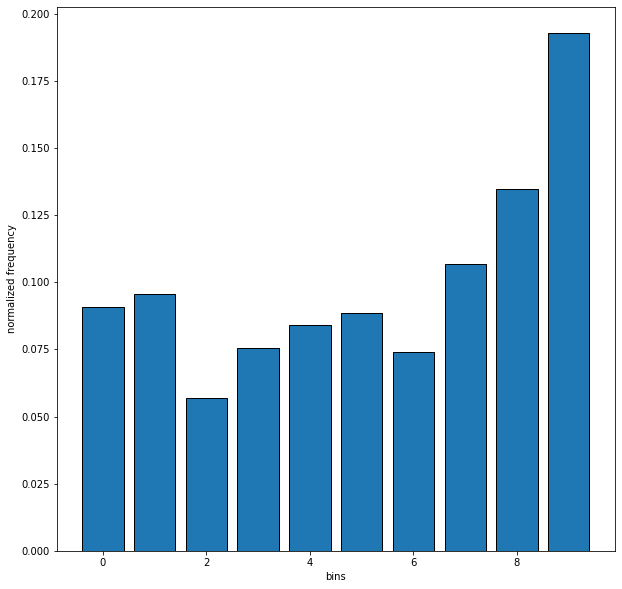

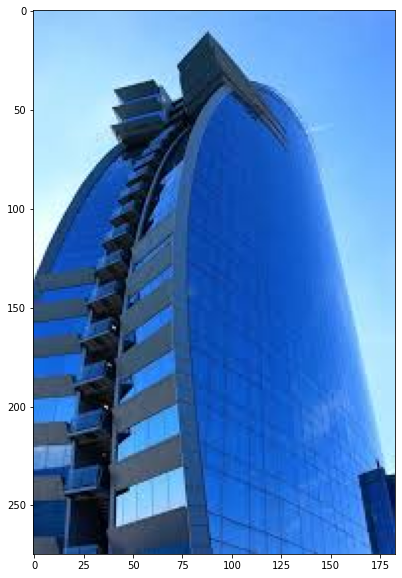

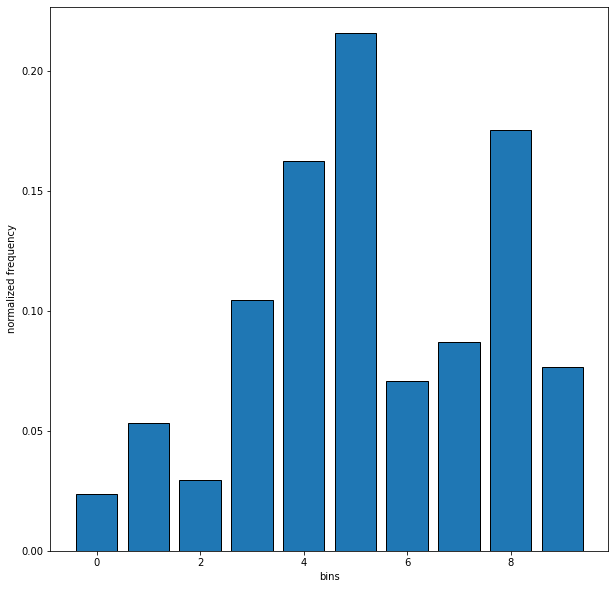

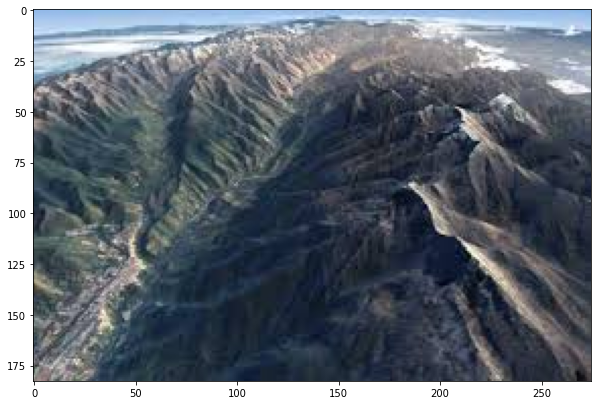

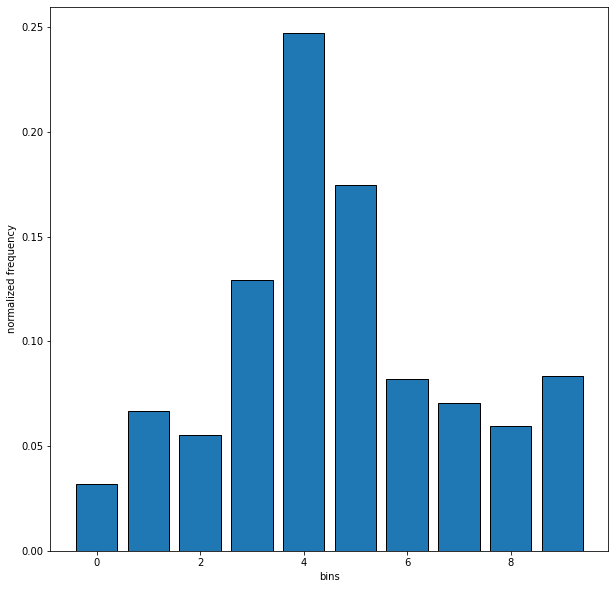

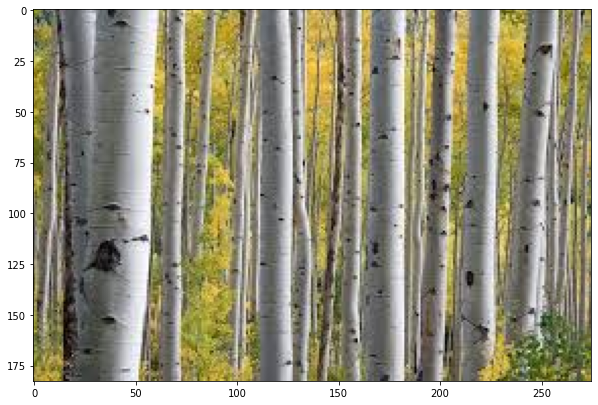

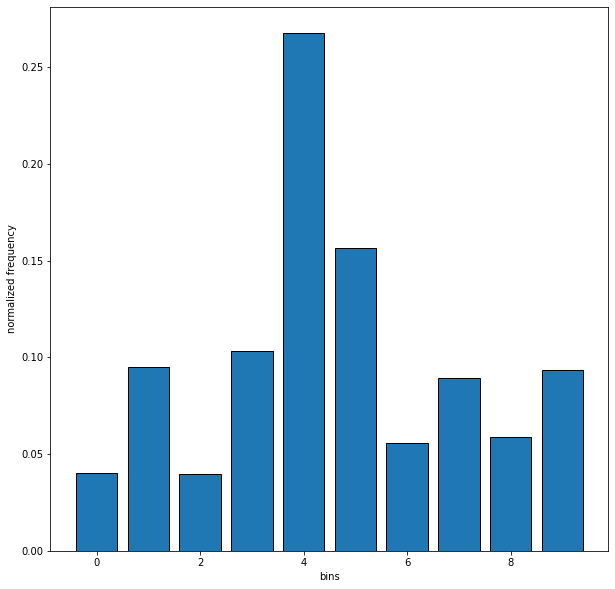

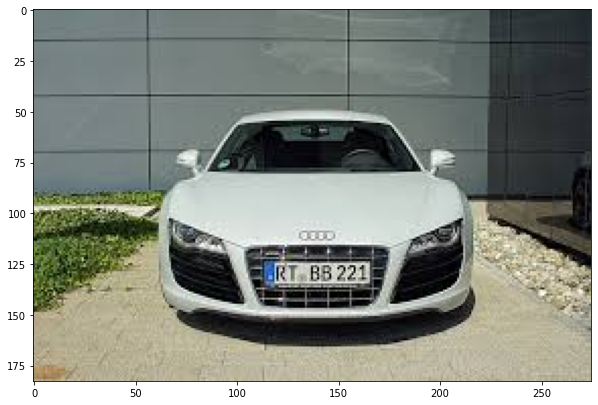

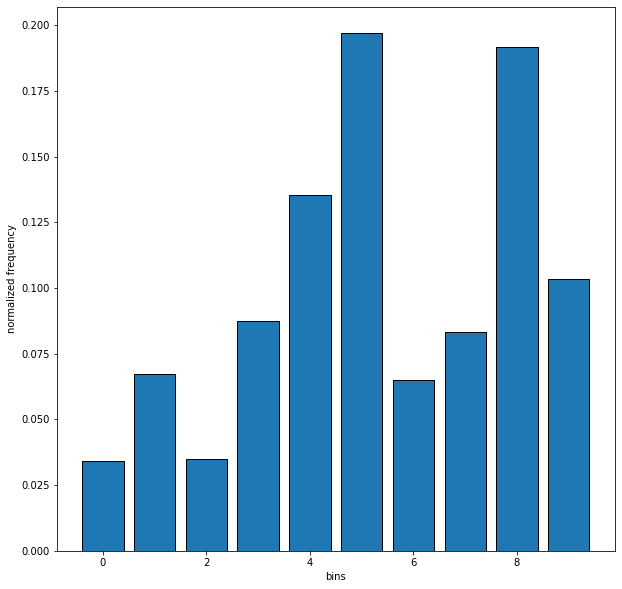

In [ ]:
#get 1 image from each class and plot the histogram

im1_path = '/content/drive/My Drive/imagesDatabaseHW7/training/beach/3.jpg'
im1 = cv2.imread(im1_path)
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im2)

hist = get_lbp_hist(im1_path)
plt.figure(figsize=(10,10))
fig=plt.bar(range(10),hist,edgecolor='black')
plt.xlabel('bins')
plt.ylabel('normalized frequency')
cv2.imwrite("beach.jpg",im1)
#cv2.imwrite("beach_hist.jpg",fig)
plt.savefig("beach_hist.jpg")


im1_path = '/content/drive/My Drive/imagesDatabaseHW7/training/building/03.jpg'
im1 = cv2.imread(im1_path)
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im2)



hist = get_lbp_hist(im1_path)
plt.figure(figsize=(10,10))
fig=plt.bar(range(10),hist,edgecolor='black')
plt.xlabel('bins')
plt.ylabel('normalized frequency')
cv2.imwrite("building.jpg",im1)
plt.savefig("building_hist.jpg")

im1_path = '/content/drive/My Drive/imagesDatabaseHW7/training/mountain/03.jpg'
im1 = cv2.imread(im1_path)
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im2)

hist = get_lbp_hist(im1_path)
plt.figure(figsize=(10,10))
fig=plt.bar(range(10),hist,edgecolor='black')
plt.xlabel('bins')
plt.ylabel('normalized frequency')
cv2.imwrite("mountain.jpg",im1)
plt.savefig("mountain_hist.jpg")


im1_path = '/content/drive/My Drive/imagesDatabaseHW7/training/tree/03.jpg'
im1 = cv2.imread(im1_path)
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im2)

hist = get_lbp_hist(im1_path)
plt.figure(figsize=(10,10))
fig=plt.bar(range(10),hist,edgecolor='black')
plt.xlabel('bins')
plt.ylabel('normalized frequency')
cv2.imwrite("tree.jpg",im1)
plt.savefig("tree_hist.jpg")

im1_path = '/content/drive/My Drive/imagesDatabaseHW7/training/car/03.jpg'
im1 = cv2.imread(im1_path)
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im2)

hist = get_lbp_hist(im1_path)
plt.figure(figsize=(10,10))
fig=plt.bar(range(10),hist,edgecolor='black')
plt.xlabel('bins')
plt.ylabel('normalized frequency')
cv2.imwrite("car.jpg",im1)
plt.savefig("car_hist.jpg")


In [ ]:
# do this for every image in the folder
def train():
  #### loading images from folder code taken from :https://www.codegrepper.com/code-examples/objectivec/how+to+load+images+from+folder+in+python
  #training_dir='/content/drive/My Drive/imagesDatabaseHW7/training/'+classname
  training_dir='/content/drive/My Drive/imagesDatabaseHW7/training/'
  classnames = os.listdir(training_dir)
  i=0
  for classname in classnames:
    #print(classnames)
    images = []
    hist_list=[]
    count=0
    image_dir = training_dir+classname
    for filename in os.listdir(image_dir):
      hist = get_lbp_hist(os.path.join(image_dir,filename))
      count+=1
      print("histogram of " + classname + " number: "+str(count))
      hist_list.append((hist,i))
    with open(classname+'_features.pickle','wb') as fp:
      pickle.dump(hist_list,fp)

    with open(classname+'_features.pickle','rb') as fp:
      pickle.load(fp)
    i+=1
  #return hist_list

In [ ]:
train()

histogram of tree number: 1
histogram of tree number: 2
histogram of tree number: 3
histogram of tree number: 4
histogram of tree number: 5
histogram of tree number: 6
histogram of tree number: 7
histogram of tree number: 8
histogram of tree number: 9
histogram of tree number: 10
histogram of tree number: 11
histogram of tree number: 12
histogram of tree number: 13
histogram of tree number: 14
histogram of tree number: 15
histogram of tree number: 16
histogram of tree number: 17
histogram of tree number: 18
histogram of tree number: 19
histogram of tree number: 20
histogram of beach number: 1
histogram of beach number: 2
histogram of beach number: 3
histogram of beach number: 4
histogram of beach number: 5
histogram of beach number: 6
histogram of beach number: 7
histogram of beach number: 8
histogram of beach number: 9
histogram of beach number: 10
histogram of beach number: 11
histogram of beach number: 12
histogram of beach number: 13
histogram of beach number: 14
histogram of beach

In [ ]:
'''
class labels:
  tree=0
  beach=1
  mountain=2
  building=3
  car=4
'''
with open('tree_features.pickle', 'rb') as fp:
  tree_features = pickle.load(fp)
with open('beach_features.pickle', 'rb') as fp:
  beach_features = pickle.load(fp)
with open('mountain_features.pickle', 'rb') as fp:
  mountain_features = pickle.load(fp)
with open('building_features.pickle', 'rb') as fp:
  building_features = pickle.load(fp)
with open('car_features.pickle', 'rb') as fp:
  car_features = pickle.load(fp)
#print(beach_features[0][-1])

train_features = tree_features + beach_features + mountain_features + building_features + car_features

In [ ]:
def test():
  #### code reference- Naveen Madapana (best solution1 2018)  ########
  testing_dir='/content/drive/My Drive/imagesDatabaseHW7/testing'
  test_img_paths = glob.glob(os.path.join(testing_dir, '*.jpg'))
  out_features = {os.path.basename(test_img_path): None for test_img_path in test_img_paths}
  #print(out_features)
  for test_img_path in test_img_paths:
    out_feat_vec = get_lbp_hist(test_img_path)
    out_features[os.path.basename(test_img_path)] = out_feat_vec
  with open('test_features.pickle', 'wb') as fp:
    pickle.dump(out_features, fp)

  with open('test_features.pickle', 'rb') as fp:
    out_features = pickle.load(fp)
  class_dict = {"tree":0, "beach":1, "mountain":2, "building":3, "car":4}
  test_features = []
  for fname, test_inst in out_features.items():
    cname = os.path.splitext(fname)[0].split('_')[0]
    c_idx = class_dict[cname]
    test_features.append((test_inst,c_idx))

  return test_features


In [ ]:
test_features=test()

In [ ]:
def most_frequent(List): 
    #https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
    return max(set(List), key = List.count) 

def get_confusion_matrix(pred,true,count):
  conf_mat = np.zeros((5,5))
  correct=0
  for i in range(len(true)):
    if pred[i]==true[i]:
      correct+=1
    conf_mat[true[i],pred[i]]+=1
  accuracy = correct/len(pred)
  print("Accuracy: ",accuracy)
  print()
  print("confusion matrix:\n",conf_mat)


def knn(train_input,test_input,metric='Euclidean',K=5):
  train_input = np.array(train_input)
  test_input = np.array(test_input)
  train_data = train_input[:,0]
  train_label = train_input[:,1]
  test_data = test_input[:,0]
  test_label = test_input[:,1]
  pred_labels=[]
  for i in range(len(test_input)):
    dist =[]
    for j in range(len(train_input)):
      if metric =='Euclidean':
        distance = np.linalg.norm(train_data[j]-test_data[i])
      elif metric =='Manhattan':
        distance = np.sum(np.abs(train_data[j]-test_data[i]))
        #distance =0
      dist.append((distance,train_label[j]))
      #print(dist)
    dist.sort(key=lambda x:x[0])
    #print(dist)
    labels=[ x[1] for x in dist]
    topK=labels[:K]
    pred_labels.append(most_frequent(topK))
  
  get_confusion_matrix(pred_labels,test_label,len(test_label))
  return pred_labels

In [ ]:
labels =knn(train_features,test_features,metric='Manhattan',K=7)

Accuracy:  0.68

confusion matrix:
 [[3. 0. 1. 1. 0.]
 [0. 5. 0. 0. 0.]
 [0. 1. 3. 1. 0.]
 [0. 0. 1. 3. 1.]
 [0. 0. 0. 2. 3.]]
